Problem Statement : We have to predict whether a given tweet is about a real disaster or not. - If so, predict a 1. If not, predict a 0.

***NECESSARY LIBRARIES***

In [ ]:
#Necessary Libraries

import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

***UNDERSTANDING DATA & FILTERING***

In [4]:
#Training data
full_path = '/Users/sanghamitramatta/Documents/All Women Bootcamp/Tweet prediction/Data/tweet_disasters.csv'
train = pd.read_csv(full_path)

print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#To understand the data, checking a row chosen at random. Here 4th row
train.iloc[3].values


array([6, nan, nan,
       '13,000 people receive #wildfires evacuation orders in California ',
       1], dtype=object)

In [6]:
# To check the unique values of the column
train['target'].unique()

array([1, 0])

In [7]:
#Filtering the rows with target value = 1
train[train['target']==1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
#To get the row of the Text column where Target column value = 1 
train[train['target']==1]["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

***EDA***

In [10]:
#Missing values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

The columns denote the following:

The text of a tweet.
A keyword from that tweet.
The location the tweet was sent from.

In [11]:
#Missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


***Exploring the Target Variable***

In [12]:
#count of rows grouped by unique values in target
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [13]:
train['target'].value_counts(normalize = True)

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

In [14]:
#To sort by count
train['target'].value_counts().index

Index([0, 1], dtype='int64', name='target')

In [15]:
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Target column')

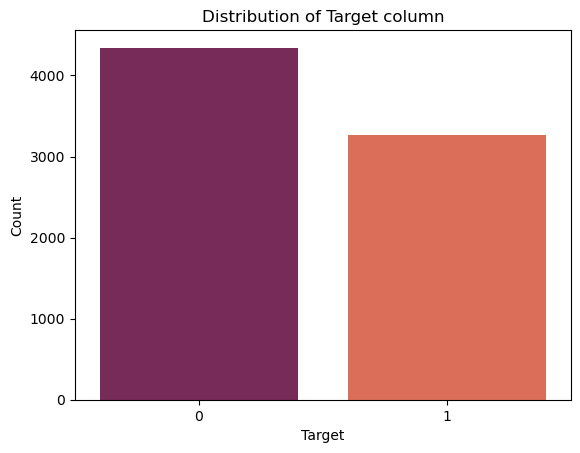

In [16]:
#Visualisation
sns.barplot(x=train['target'].value_counts().index,
            y=train['target'].value_counts().values,
            palette='rocket')
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target column")

***DISASTER TWEETS***

In [17]:
#Tweets about disaster. print(disaster_tweets) gives df and disaster_tweets.values give the output as an array
disaster_tweets = train[train['target']==1]['text']

disaster_tweets.values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [18]:
#As a random check
disaster_tweets.values[55]

"@AlexAllTimeLow awwww they're on an airplane accident and they're gonna die what a cuties ???? good job!"

NON DISASTER TWEETS

In [19]:
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values

array(["What's up man?", 'I love fruits', 'Summer is lovely', ...,
       'These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittens\x89Û_ https://t.co/TFGrAyuDC5',
       'Sirens everywhere!',
       'I just heard a really loud bang and everyone is asleep great'],
      dtype=object)

In [20]:
non_disaster_tweets.values[26]

'I gained 3 followers in the last week. You? Know your stats and grow with http://t.co/TIyUliF5c6'

***EXPLORING THE 'KEYWORD' COLUMN***

In [21]:
train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

<Axes: xlabel='count', ylabel='keyword'>

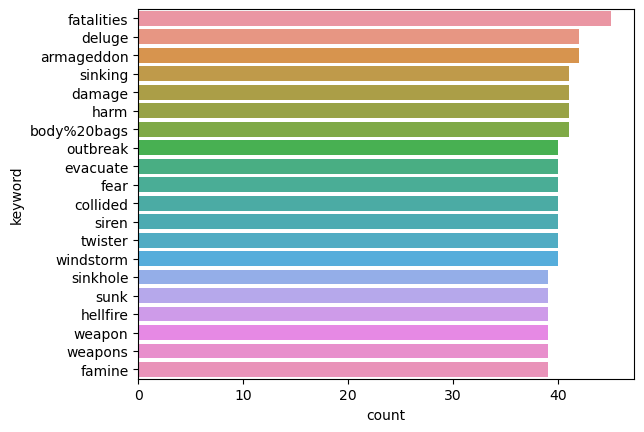

In [22]:
sns.barplot(y= train['keyword'].value_counts()[:20].index,
            x= train['keyword'].value_counts()[:20],
            orient = 'h')

UNDERSTADING HOW MANY ROWS CONTAIN DISASTER

In [23]:
#To get the dataframe with two columns - text and target, with the rows which that contain the word 'disaster'

df = train.loc[train['text'].str.contains('disaster'),['text','target']]

In [24]:
df['target'].value_counts()

target
1    77
0    32
Name: count, dtype: int64

In [25]:
df[df['target']==0]['text'][:3]

2781    I forgot to bring chocolate with me. Major dis...
2783             I'm a disaster?? https://t.co/VCV73BUaCZ
2786    Beautiful disaster // Jon McLaughlin is such a...
Name: text, dtype: object

So, not all the rows that have the word 'disaster' are related to disasters

EXPLORING THE 'LOCATION' COLUMN

In [26]:
train.location.value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [27]:
# standardising the location values
train['location'].replace({"United States":'USA',
                           "London":'UK',
                           "Los Angeles, CA":'USA',
                           "Washington, D.C.":'USA',
                           "Washington, DC":'USA',
                           "California":'USA',
                           "Chicago, IL":'USA',
                           "Chicago":'USA',
                           "New York, NY":'USA',
                           "NY" : 'USA',
                           "California, USA":'USA',
                           "Florida":'USA',
                           "Everywhere":'Worldwide',
                           "San Francisco":'USA',
                           "Florida":'USA',
                           "United Kingdom":'UK',
                           "Los Angeles":'USA',
                           "Toronto":'Canada',
                           "San Francisco, CA":'USA',
                           "NYC":'USA',
                           "Seattle":'USA',
                           "Earth":'Worldwide',
                           "Ireland":'IR',
                           "London, England":'UK',
                           "New York City":'USA',
                           "Texas":'USA',
                           "London, UK":'UK',
                           "Dundee, UK":'UK',
                           "Atlanta, GA":'USA',
                           "Mumbai":"India"},inplace=True)

In [28]:
train['location'].value_counts()[:10]

location
USA          400
UK           107
New York      71
India         46
Worldwide     45
Canada        41
Nigeria       28
Kenya         20
Australia     18
Indonesia     13
Name: count, dtype: int64

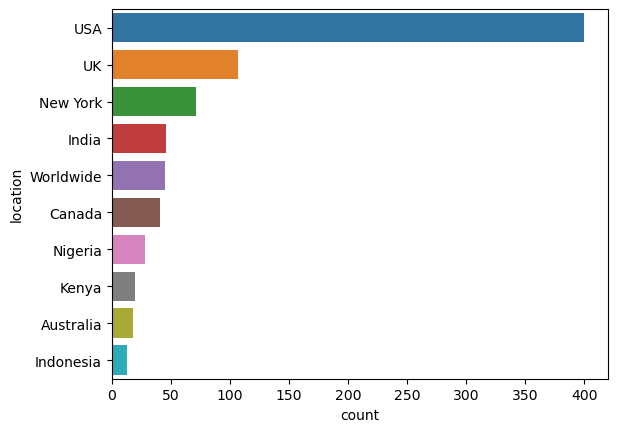

In [30]:
sns.barplot(y=train['location'].value_counts()[:10].index,
            x=train['location'].value_counts()[:10],
            orient='h');